![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0b3e5;"> Supervised Learning Project Part A
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0b3e5;"> Shameer.Sutar



# **DOMAIN:** Semiconductor manufacturing process

* **CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

* **DATA DESCRIPTION:** sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

* **PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from numpy import sort
from pandas import set_option
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from matplotlib.cbook import boxplot_stats
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, fbeta_score, make_scorer, recall_score,mean_absolute_error,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Import ‘signal-data.csv’ as DataFrame.</div>

In [2]:
df = pd.read_csv('signal-data.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
df.shape

(1567, 592)

In [6]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">5 point summary</div>

In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,1567,1534,2008-10-15 01:52:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1561.0,NaN,NaN,NaN,3014.452896,73.621787,2743.24,2966.26,3011.49,3056.65,3356.35
1,1560.0,NaN,NaN,NaN,2495.850231,80.407705,2158.75,2452.2475,2499.405,2538.8225,2846.44
2,1553.0,NaN,NaN,NaN,2200.547318,29.513152,2060.66,2181.0444,2201.0667,2218.0555,2315.2667
3,1553.0,NaN,NaN,NaN,1396.376627,441.69164,0.0,1081.8758,1285.2144,1591.2235,3715.0417
...,...,...,...,...,...,...,...,...,...,...,...
586,1566.0,NaN,NaN,NaN,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,NaN,NaN,NaN,0.016475,0.008808,0.0032,0.0106,0.0148,0.0203,0.0799
588,1566.0,NaN,NaN,NaN,0.005283,0.002867,0.001,0.0033,0.0046,0.0064,0.0286
589,1566.0,NaN,NaN,NaN,99.670066,93.891919,0.0,44.3686,71.9005,114.7497,737.3048


**OBSERVATIONS**

1. The data is not scaled across different sensors. Some sensors have higher reading while other sensors have lower readings.
2. For each sensor, the data seems to be on the same scale. But the scale is still different from one sensor to another.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.</div>

In [8]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [9]:
# Create copy of dataframe
df_clean = df

# for loop to remove features/columns with > 0.2 or > 20% null values and impute other features/columns with mean
for (col_name,col_data) in df_clean.iteritems():
    # identify if columns have > 20% null values
    if col_data.isnull().sum()*100 / len(df_clean)>0.2:
        # drop the column with > 20% null values
        df_clean = df_clean.drop(col_name, axis = 1)
    # else impute column with mean if the column has null values
    elif col_data.isnull().any() == True:
        df_clean[col_name].fillna(df_clean[col_name].mean(), inplace = True)
        
# Check for missing values
df_clean.isnull().sum()

Time         0
8            0
9            0
10           0
11           0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 254, dtype: int64

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Identify and drop the features which are having same value for all the rows.</div>

In [10]:
df_clean[df_clean.duplicated()]

,Time,8,9,10,11,12,13,14,15,16,...,577,582,583,584,585,586,587,588,589,Pass/Fail


In [11]:
# Check for duplicate values in the dataframe
df_clean.duplicated().any()

False

> **There are no duplicate values or rows in the dataframe. No treatment necessary.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Drop other features if required using relevant functional knowledge. Clearly justify the same.</div>

In [12]:
# Drop time column as it will not contribute towards model building
# Time column only acts as an indicator - when were the signals from different sensors recorded
df_clean = df_clean.drop('Time',axis=1)
df_clean

,8,9,10,11,12,13,14,15,16,17,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.500500,0.016200,-0.003400,0.945500,202.439600,0.0,7.955800,414.871000,10.043300,0.968000,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,1.496600,-0.000500,-0.014800,0.962700,200.547000,0.0,10.154800,414.734700,9.259900,0.970100,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,1.443600,0.004100,0.001300,0.961500,202.017900,0.0,9.515700,416.707500,9.314400,0.967400,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,1.488200,-0.012400,-0.003300,0.962900,201.848200,0.0,9.605200,422.289400,9.692400,0.968700,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,1.503100,-0.003100,-0.007200,0.956900,201.942400,0.0,10.566100,420.592500,10.338700,0.973500,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.342400,-0.004500,-0.005700,0.957900,203.986700,0.0,11.769200,419.340400,10.239700,0.969300,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,1.433300,-0.006100,-0.009300,0.961800,204.017300,0.0,9.162000,405.817800,10.228500,0.969600,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,1.462200,-0.007200,0.003200,0.969400,197.244800,0.0,9.735400,401.915300,9.863000,0.974000,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


In [13]:
# check whether any of the columns has any value other than numeric 
# i.e. data is not corrupted such as a "?" instead of a number
df_clean[~df_clean.applymap(np.isreal).all(1)]

,8,9,10,11,12,13,14,15,16,17,...,577,582,583,584,585,586,587,588,589,Pass/Fail


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Check for multi-collinearity in the data and take necessary action. </div>

In [14]:
 # Let's check for highly correlated variables
cor= df_clean.corr()

cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()

# Extract those features that have very high correlation - +/- 0.9
temp = cor[(cor > 0.90) | (cor< -0.90)].to_dict()
temp

{('27', '25'): 0.9803753833240896,
 ('36', '34'): -0.9999999997052148,
 ('50', '46'): 0.904481825916677,
 ('148', '16'): 0.9702941014493074,
 ('152', '16'): 0.9775661160561907,
 ('152', '148'): 0.9910694582650631,
 ('154', '148'): 0.9396050560127639,
 ('164', '163'): 0.9248163707333443,
 ('165', '164'): 0.963662602553624,
 ('174', '172'): 0.9999998114016202,
 ('249', '114'): 0.9770501850466099,
 ('252', '117'): 0.9861933657838748,
 ('279', '144'): 0.9767552096844969,
 ('280', '145'): 0.9597816072041465,
 ('281', '146'): 0.9538695194170509,
 ('282', '147'): 0.9995955653522274,
 ('283', '16'): 0.9713232599947812,
 ('283', '148'): 0.9995218286822916,
 ('283', '152'): 0.9917748644859974,
 ('283', '154'): 0.936241027512873,
 ('285', '150'): 0.9702572948550757,
 ('286', '151'): 0.9900031988390738,
 ('287', '16'): 0.9776476351736362,
 ('287', '148'): 0.9910771233820851,
 ('287', '152'): 0.9999970976317963,
 ('287', '283'): 0.9917862663223147,
 ('288', '153'): 0.9982217992904813,
 ('289', '148

In [15]:
# In the above dictionary, we have two keys which are the two features/columns 
# and one value which is the correlation between the two features/columns
# We need to extract the features from the keys 

# Empty Lists to store keys from dictionary
feature1 = []
feature2 = []

# Find feature names from keys in the dictionary and store in respective lists
for k1, k2 in temp.keys():
    feature1.append(k1)
    feature2.append(k2)

# Print names of Features
print(feature1)
print(' ')
print(feature2)

['27', '36', '50', '148', '152', '152', '154', '164', '165', '174', '249', '252', '279', '280', '281', '282', '283', '283', '283', '283', '285', '286', '287', '287', '287', '287', '288', '289', '289', '289', '291', '294', '295', '296', '297', '298', '298', '298', '299', '299', '299', '299', '300', '300', '300', '300', '300', '301', '302', '303', '304', '305', '306', '307', '307', '308', '309', '309', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '356', '359', '360', '361', '365', '366', '376', '377', '386', '387', '387', '388', '389', '390', '390', '392', '393', '417', '417', '420', '420', '420', '420', '420', '420', '421', '421', '421', '421', '421', '421', '421', '424', '424', '425', '425', '425', '425', '425', '425', '426', '426', '427', '427', '427', '427', '427', '427', '427', '429', '429', '434', '434', '435', '435', '435', '435', '436', '436', '436', '436', '436', '437', '437', '440', '440', '441', '441', '442', '442', '443', '443', '443', '443', '

In [16]:
# We can drop one of the feature list as the other list has features that are highly correlated with the first list
# Hence we drop feature1 list from the dataframe

df_clean = df_clean.drop(feature1, axis = 1)
df_clean

,8,9,10,11,12,13,14,15,16,17,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,1.500500,0.016200,-0.003400,0.945500,202.439600,0.0,7.955800,414.871000,10.043300,0.968000,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,1.496600,-0.000500,-0.014800,0.962700,200.547000,0.0,10.154800,414.734700,9.259900,0.970100,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,1.443600,0.004100,0.001300,0.961500,202.017900,0.0,9.515700,416.707500,9.314400,0.967400,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,1.488200,-0.012400,-0.003300,0.962900,201.848200,0.0,9.605200,422.289400,9.692400,0.968700,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,1.503100,-0.003100,-0.007200,0.956900,201.942400,0.0,10.566100,420.592500,10.338700,0.973500,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.342400,-0.004500,-0.005700,0.957900,203.986700,0.0,11.769200,419.340400,10.239700,0.969300,...,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000,-1
1563,1.433300,-0.006100,-0.009300,0.961800,204.017300,0.0,9.162000,405.817800,10.228500,0.969600,...,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000,-1
1564,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,...,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100,-1
1565,1.462200,-0.007200,0.003200,0.969400,197.244800,0.0,9.735400,401.915300,9.863000,0.974000,...,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100,-1


** Multicollinearity occurs when two or more independent variables are highly correlated with one another.**
* VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
* VIF score of an independent variable represents how well the variable is explained by other independent variables.
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [17]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for calculating VIF values for each column
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Drop the target column Pass/Fail
#vif_data = signal_data_clean2.iloc[:,:-1]

# Calculate VIF for independent variables of dataframe by passing it to the function calc_vif
#vif_table = calc_vif(vif_data)
#vif_table

# Shape of the dataframe on which multicollinearity treatment is to be done
df_clean.shape

(1567, 143)

In [18]:
# Define Function to remove multi-collinearity
def remove_multicollinearity(df,vif_thresh=10):
    # Drop the target column Pass/Fail to avoid VIF calculation
    vif_data = df.iloc[:,:-1]
    # Calculate VIF for independent variables of dataframe
    vif_table = calc_vif(vif_data)
    # Find Maximum VIF value from the above table
    max_vif = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,1]
    # Find feature/column with maximum VIF value
    max_vif_feature = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,0]
    # Print Maximum VIF Value and Feature/Column
    print('Initial Max VIF',max_vif)
    print(' ')
    print('Initial Max VIF Feature to be dropped',max_vif_feature)
    # Dropping variables should be an iterative process starting with the variable having the largest VIF value 
    # because its trend is highly captured by other variables. 
    # Loop until maximum VIF value is lower than the VIF threshold
    while max_vif > vif_thresh:
        # Drop feature/column with maximum VIF value
        vif_data = vif_data.drop(max_vif_feature, axis=1)
        # Re-calculate VIF table of new dataframe from above step
        vif_table = calc_vif(vif_data)
        # Find feature/column with maximum VIF value
        max_vif = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,1]
        # Find feature/column with maximum VIF value
        max_vif_feature = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,0]
        
        if max_vif > vif_thresh:
            # Print Maximum VIF Value and Feature/Column
            print('Max VIF',max_vif)
            print(' ')
            print('Last VIF Feature Dropped',max_vif_feature)
            
        # Store the updated dataframe in a new variable
        data_mulcorr_removed = vif_data
    return data_mulcorr_removed
    
# Call Function
data_mulcorr_removed = remove_multicollinearity(df_clean)

Initial Max VIF 2089.1570100295016
 
Initial Max VIF Feature to be dropped 12
Max VIF 325.4221616863986
 
Last VIF Feature Dropped 430
Max VIF 200.17760300118934
 
Last VIF Feature Dropped 46
Max VIF 28.94890610676398
 
Last VIF Feature Dropped 25
Max VIF 22.00308804732176
 
Last VIF Feature Dropped 147
Max VIF 15.15706287847868
 
Last VIF Feature Dropped 51
Max VIF 14.108875735313127
 
Last VIF Feature Dropped 150
Max VIF 10.701710771082016
 
Last VIF Feature Dropped 431


In [19]:
data_mulcorr_removed 

,8,9,10,11,13,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,1.500500,0.016200,-0.003400,0.945500,0.0,7.955800,414.871000,10.043300,0.968000,192.396300,...,0.1039,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066
1,1.496600,-0.000500,-0.014800,0.962700,0.0,10.154800,414.734700,9.259900,0.970100,191.287200,...,0.0375,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500
2,1.443600,0.004100,0.001300,0.961500,0.0,9.515700,416.707500,9.314400,0.967400,192.703500,...,0.1233,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200
3,1.488200,-0.012400,-0.003300,0.962900,0.0,9.605200,422.289400,9.692400,0.968700,192.155700,...,0.2710,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200
4,1.503100,-0.003100,-0.007200,0.956900,0.0,10.566100,420.592500,10.338700,0.973500,191.603700,...,0.0461,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.342400,-0.004500,-0.005700,0.957900,0.0,11.769200,419.340400,10.239700,0.969300,193.747000,...,0.0929,536.3418,2.0153,7.98,0.2363,0.4988,0.0143,0.006800,0.013800,203.172000
1563,1.433300,-0.006100,-0.009300,0.961800,0.0,9.162000,405.817800,10.228500,0.969600,193.788900,...,0.0696,537.9264,2.1814,5.48,0.3891,0.4975,0.0131,0.006800,0.013800,203.172000
1564,1.462862,-0.000841,0.000146,0.964353,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,...,0.0332,530.3709,2.3435,6.49,0.4154,0.4987,0.0153,0.019700,0.008600,43.523100
1565,1.462200,-0.007200,0.003200,0.969400,0.0,9.735400,401.915300,9.863000,0.974000,187.381800,...,0.0435,534.3936,1.9098,9.13,0.3669,0.5004,0.0178,0.026200,0.024500,93.494100


In [20]:
# Re-calculate VIF
vif_table = calc_vif(data_mulcorr_removed)

# Features that have a VIF > 10
vif_table[vif_table['VIF']>10]

,variables,VIF


In [21]:
# No more features with VIF>10 are remaining. 
# The dataframe has 134 columns and one target column Pass/Fail has to be appended.

df = pd.concat([data_mulcorr_removed, df_clean['Pass/Fail']], axis=1)
df.head()

,8,9,10,11,13,14,15,16,17,18,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,1.5005,0.0162,-0.0034,0.9455,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,1.4966,-0.0005,-0.0148,0.9627,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,1.4436,0.0041,0.0013,0.9615,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,1.4882,-0.0124,-0.0033,0.9629,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,1.5031,-0.0031,-0.0072,0.9569,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Make all relevant modifications on the data using both functional/logical reasoning/assumptions.</div>

* Features with more than 20% null values were removed as per instructions.
* Features with less than 20% null values were imputed with mean as per instructions.
* Time column was removed as it will not contribute to model building.
* Variables with high correlation (>0.9 and <-0.9) were also dropped and only their partner variables were kept.
* Multi-collinearity treatment was performed and VIF>10 variables were removed.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.
</div>

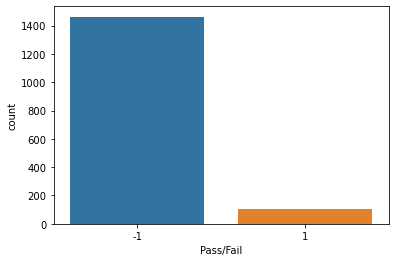

In [41]:
# Univariate Analysis - Countplot of Target Variable
sns.countplot(df['Pass/Fail']);

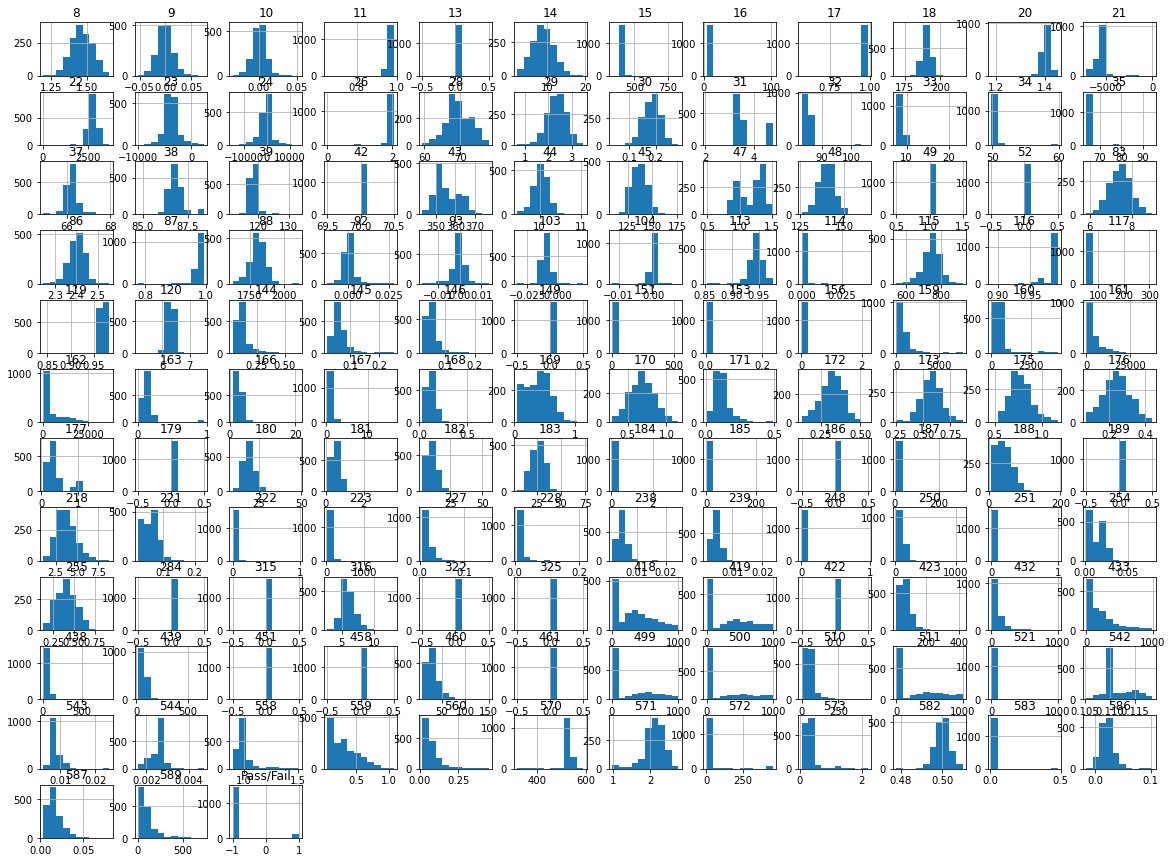

In [22]:
# Univariate Analysis - Plot histogram
df.hist(figsize=(20,15));

* From the above histogram, it is seen that the values from different sensors are not all normally distributed.
* No clear pattern is observed. Some sensors have data that are skewed and uniform as well.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.</div>

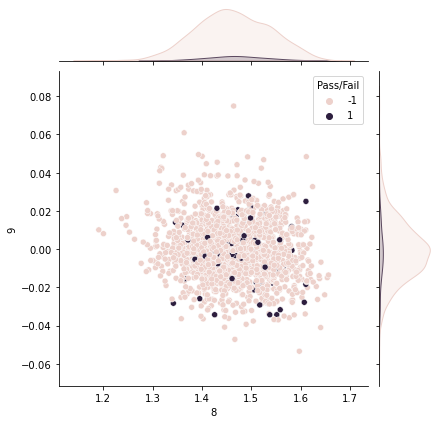

In [23]:
sns.jointplot(data=df,x='8',y='9',hue='Pass/Fail');

* The above plot indicates that the scale of different variables are different.
* There is no pattern to clearly say that a particular sensor reading is pass or fail.
* Because of the size and randomness of the sensor data, pairplot analysis isn't possible.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Segregate predictors vs target attributes.</div>

In [24]:
# Let predictors be X
X = df.drop(columns = 'Pass/Fail', axis=1)

# Display names of columns
X.columns

Index(['8', '9', '10', '11', '13', '14', '15', '16', '17', '18',
       ...
       '560', '570', '571', '572', '573', '582', '583', '586', '587', '589'],
      dtype='object', length=134)

In [25]:
# Let target attributes be Y
Y = df['Pass/Fail']

# Display head
Y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: int64

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Check for target balancing and fix it if found imbalanced. </div>

In [34]:
# Find if target column is imbalanced
Y.value_counts()


-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [27]:
# Clearly the target columns is imbalanced. -1 (Pass) is significantly higher than 1 (Fail)
# Balancing is necessary

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

type(X_train)

pandas.core.frame.DataFrame

In [28]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

X_train_res.head()

,8,9,10,11,13,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,1.5865,0.0080,-0.0216,0.9751,0.0,7.9191,416.1765,9.5523,0.9731,192.3299,...,0.0298,534.0609,2.4197,8.36,0.3706,0.4952,0.0136,0.0104,0.0083,79.8045
1,1.3720,-0.0005,0.0052,0.9675,0.0,10.1995,415.3266,8.9253,0.9716,189.1111,...,0.1527,534.1891,2.0627,7.72,0.3563,0.4998,0.0097,0.0328,0.0235,71.5333
2,1.4615,-0.0034,-0.0042,0.9581,0.0,9.0188,405.2932,10.0926,0.9740,189.4727,...,0.1416,537.6418,2.2678,10.22,0.3876,0.4961,0.0124,0.0155,0.0177,114.4127
3,1.5251,0.0468,-0.0010,0.9753,0.0,10.4507,414.6213,9.1843,0.9704,188.4943,...,0.0680,534.5745,1.9791,9.70,0.2482,0.4965,0.0186,0.0335,0.0084,25.1494
4,1.3762,-0.0206,-0.0104,0.9792,0.0,9.0685,397.0925,9.5181,0.9787,188.4241,...,0.0642,524.4955,1.0912,11.12,0.1474,0.4949,0.0146,0.0137,0.0326,237.4625


In [29]:
y_train_res

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Perform train-test split and standardise the data or vice versa if required.</div>

In [35]:
# Standardize Training Data

# Import Library
from sklearn.preprocessing import StandardScaler

# Define method
scaler = StandardScaler()

# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train_res), columns = X_train_res.columns)
normalized_x_train.head()

,8,9,10,11,13,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,1.830729,0.748219,-2.796834,0.996714,0.0,-0.321641,0.241668,-0.172947,0.199989,0.905188,...,-0.980234,0.213614,1.188983,-0.180237,0.267314,-1.469296,-0.160735,-1.015300,-1.082084,-0.257591
1,-1.582879,0.113010,0.573032,0.326206,0.0,0.574375,0.171004,-0.471068,0.061584,-0.416503,...,1.701629,0.224611,-0.062589,-0.190399,0.192712,-0.103991,-0.500272,1.027575,0.717507,-0.356925
2,-0.158553,-0.103709,-0.608936,-0.503105,0.0,0.110454,-0.663209,0.083951,0.283031,-0.268024,...,1.459410,0.520775,0.656451,-0.150704,0.356001,-1.202171,-0.265208,-0.550181,0.030821,0.158041
3,0.853594,3.647762,-0.206564,1.014358,0.0,0.673077,0.112363,-0.347921,-0.049140,-0.669771,...,-0.146653,0.257669,-0.355674,-0.158961,-0.371237,-1.083449,0.274570,1.091415,-1.070244,-0.913978
4,-1.516039,-1.389073,-1.388532,1.358435,0.0,0.129982,-1.345045,-0.189208,0.716700,-0.698596,...,-0.229574,-0.606884,-3.468478,-0.136414,-0.897102,-1.558337,-0.073674,-0.714340,1.794893,1.635824


In [36]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

,8,9,10,11,13,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,1.930989,1.368482,-0.608936,0.255627,0.0,-1.793560,-1.362629,0.007590,0.116946,-3.657701,...,-0.801298,0.017655,0.465035,-0.176744,-0.527744,1.112912,-0.334857,-0.130662,0.492558,0.079023
1,0.143818,1.069560,0.032344,0.423253,0.0,0.845097,0.569677,0.013581,0.273804,0.942677,...,0.942240,0.177201,0.735683,-0.105135,-0.145866,0.341218,0.466103,-0.139782,0.362325,0.015263
2,-0.460924,1.809392,0.384420,0.449721,0.0,-0.717980,2.881169,-0.142279,0.292258,-0.142950,...,-0.888584,-0.033897,-0.143573,-0.184524,-0.268985,1.023870,0.056917,-0.440741,1.605463,1.010066
3,-0.957449,0.957464,0.698773,0.229159,0.0,-0.935815,-1.109482,0.161215,0.827424,-0.402090,...,-0.277582,-0.085982,0.214370,-0.140384,0.532333,0.044412,0.178803,1.118775,-1.247835,-0.972108
4,0.349112,-0.402631,-1.979516,-1.253015,0.0,1.912465,0.940506,0.028748,-1.017974,-0.471566,...,-0.617997,-18.388516,1.486977,4.241082,1.248094,0.074093,0.170096,-0.404261,-0.928171,-0.542443


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Check if the train and test data have similar statistical characteristics when compared with original data.</div>

In [37]:
# Statistics of Train Data
normalized_x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
8,2048.0,7.314841e-16,1.000244,-4.463360,-0.641710,0.000767,0.671961,2.943136
9,2048.0,2.816215e-17,1.000244,-3.840233,-0.619349,0.022703,0.540374,5.747688
10,2048.0,-2.106063e-17,1.000244,-4.217710,-0.563789,0.052247,0.622228,4.521306
11,2048.0,5.052436e-15,1.000244,-27.208704,-0.527291,0.096822,0.582058,1.852493
13,2048.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
582,2048.0,-5.377534e-15,1.000244,-5.980739,-0.659367,0.014732,0.641530,2.864064
583,2048.0,3.428112e-17,1.000244,-0.822398,-0.313578,-0.117204,0.130906,40.148453
586,2048.0,-2.444876e-17,1.000244,-2.510976,-0.643365,-0.061115,0.544216,7.411559
587,2048.0,3.623946e-17,1.000244,-1.685894,-0.691678,-0.170449,0.492768,7.394935


In [38]:
# Statistics of Test Data
normalized_x_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
8,471.0,-0.184729,1.179922,-4.312175,-0.992460,-0.212662,0.692064,2.406826
9,471.0,0.087909,1.080865,-2.898629,-0.623086,0.083117,0.737009,3.767330
10,471.0,-0.006499,1.285282,-4.469192,-0.822696,-0.005378,0.711347,6.583463
11,471.0,0.072471,0.802235,-1.879410,-0.525162,0.176224,0.679105,1.649576
13,471.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
582,471.0,0.040946,1.019046,-6.633711,-0.608560,0.103773,0.697384,2.864064
583,471.0,0.022389,1.883688,-0.778867,-0.343563,-0.143323,0.083036,39.695736
586,471.0,-0.037216,1.096045,-3.505053,-0.691540,-0.075942,0.530536,7.411559
587,471.0,-0.144483,0.905848,-1.567500,-0.774259,-0.312522,0.214332,3.925987


* The descriptive statistics of training and test data indicate that standardisation has brought the sensor data on a common scale with little variation among them.

In [39]:
# Class count for training data

print("Before UpSampling, counts of label Pass '-1': {}".format(sum(y_train== -1)))
print("Before UpSampling, counts of label Fail '1': {} \n".format(sum(y_train== 1)))

print("After UpSampling, counts of label Pass '-1': {}".format(sum(y_train_res== -1)))
print("After UpSampling, counts of label Fail '1': {} \n".format(sum(y_train_res== 1)))

Before UpSampling, counts of label Pass '-1': 1024
Before UpSampling, counts of label Fail '1': 72 

After UpSampling, counts of label Pass '-1': 1024
After UpSampling, counts of label Fail '1': 1024 



In [40]:
# Class count for test data
y_test.value_counts()

-1    439
 1     32
Name: Pass/Fail, dtype: int64

# Model training, testing and tuning:

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Use any Supervised Learning technique to train a model.</div>

Accuracy Score of Training Data:  0.880859375

Accuracy Score of Test Data: 0.7622080679405521

Classification Report of SVC Model:
                precision    recall  f1-score   support

          -1       0.94      0.80      0.86       439
           1       0.08      0.25      0.12        32

    accuracy                           0.76       471
   macro avg       0.51      0.52      0.49       471
weighted avg       0.88      0.76      0.81       471


Mean Absolute Error of SVC:
 0.47558386411889597

Confusion Matrix of SVC:
 [[351  88]
 [ 24   8]]


<AxesSubplot:>

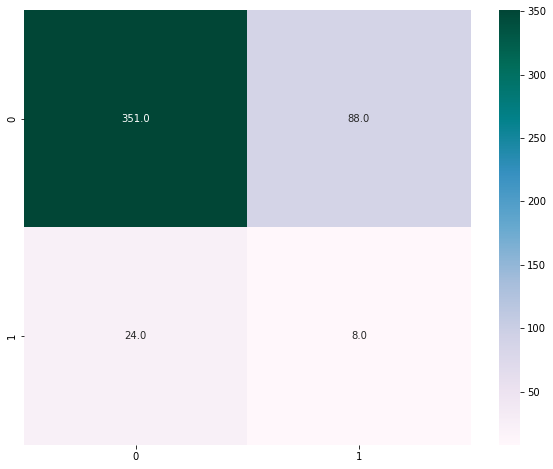

In [128]:
logreg = LogisticRegression()
# fitting the model
logreg.fit(normalized_x_train, y_train_res)

# predict the response
y_predict = logreg.predict(normalized_x_test)

print('Accuracy Score of Training Data: ', logreg.score(normalized_x_train, y_train_res))

cfm_lr= confusion_matrix(y_test, y_predict)


# evaluate accuracy
logreg_score_linear = accuracy_score(y_test, y_predict)
print('\nAccuracy Score of Test Data:',logreg_score_linear)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predict))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predict))
print('\nConfusion Matrix of SVC:\n', cfm_lr)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_lr, annot = True, cmap = 'PuBuGn', fmt = '.1f')

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Use cross validation techniques.</div>

In [129]:

# Define number of folds
num_folds = 50

# Create KFolds object
kfold = KFold(n_splits=num_folds)

# Store results of CV score
results = cross_val_score(logreg,normalized_x_train, y_train_res, cv=kfold)
results

array([0.85365854, 0.80487805, 0.80487805, 0.87804878, 0.73170732,
       0.82926829, 0.80487805, 0.70731707, 0.92682927, 0.82926829,
       0.73170732, 0.85365854, 0.82926829, 0.90243902, 0.7804878 ,
       0.75609756, 0.80487805, 0.63414634, 0.75609756, 0.85365854,
       0.70731707, 0.87804878, 0.73170732, 0.73170732, 0.85365854,
       0.87804878, 0.85365854, 0.82926829, 0.87804878, 0.87804878,
       0.97560976, 0.90243902, 0.90243902, 0.92682927, 0.97560976,
       0.87804878, 0.90243902, 0.85365854, 0.92682927, 0.95121951,
       0.90243902, 0.90243902, 0.85365854, 1.        , 0.92682927,
       0.95121951, 0.92682927, 0.95121951, 0.85      , 0.85      ])

In [130]:
# Mean accuracy results
np.mean(abs(results))

0.852048780487805

In [134]:
# Standard Deviation of accuracy results
results.std()

0.07886970708715912

In [135]:
# k-fold cross validation with stratification
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k)
results = cross_val_score(logreg, normalized_x_train, y_train_res, cv = stratified_kfold)

In [136]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8554830224772836
Standard deviation:  0.024056954378187976


In [137]:
# Bootstrapping
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(normalized_x_train, y_train_res)
    logreg.fit(X_, y_)
    y_pred = logreg.predict(normalized_x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [138]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7481953290870488
Standard deviation:  0.014898348019404574


In [139]:
# Leave One Out Cross-Validation
# Import library
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# Store LOOCV scores
scores = cross_val_score(logreg, normalized_x_train, y_train_res, cv=LeaveOneOut())
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [140]:
# Mean of scores
scores.mean()

0.8603515625

In [141]:
# Standard Deviation of scores
scores.std()

0.3466219142001968

* k-fold cross validation with stratification gives the best results.
* The standard deviation is the lowest.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Apply hyper-parameter tuning techniques to get the best accuracy. </div>

In [98]:
# Define grid
grid={"penalty":['l1','l2','elasticnet','none'],
      "C" : np.logspace(-5,5,10),
      "class_weight":['balanced','none'],
      "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "random_state": [1]}

# Apply GridSearchCV
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression()
grid_logreg=GridSearchCV(logreg,grid,cv=10)
grid_logreg.fit(normalized_x_train, y_train_res)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'class_weight': ['balanced', 'none'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [99]:
print("tuned hpyerparameters :(best parameters) ",grid_logreg.best_params_)
print("accuracy :",grid_logreg.best_score_*100)

tuned hpyerparameters :(best parameters)  {'C': 0.2782559402207126, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg'}
accuracy : 85.9875657580105


In [100]:
# run randomized search
from sklearn.model_selection import RandomizedSearchCV

samples = 10  # number of random samples 
logreg_randomCV = RandomizedSearchCV(logreg, param_distributions=grid, n_iter=samples, random_state=1) #default cv = 3

logreg_randomCV.fit(normalized_x_train, y_train_res)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                                        'class_weight': ['balanced', 'none'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [1],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=1)

In [101]:
print("tuned hpyerparameters :(best parameters) ",logreg_randomCV.best_params_)
print("accuracy :",logreg_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'solver': 'sag', 'random_state': 1, 'penalty': 'none', 'class_weight': 'none', 'C': 100000.0}
accuracy : 85.2537420239728


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Use any other technique/method which can enhance the model performance. </div>

In [102]:
normalized_x_train.shape

(2048, 134)

In [103]:
from sklearn.decomposition import PCA
pca = PCA(134)# Initialize PCA object
pca.fit(normalized_x_train)  # Fit the PCA object with the train data

PCA(n_components=134)

In [104]:
# Covariance matrix
cov_matrix = np.cov(normalized_x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Covariance Matrix 
%s [[ 1.00048852 -0.17372831  0.0485585  ... -0.01751528  0.02062693
  -0.00938215]
 [-0.17372831  1.00048852 -0.00657604 ...  0.05915128  0.0593222
  -0.01573238]
 [ 0.0485585  -0.00657604  1.00048852 ... -0.08532062  0.05419832
   0.0905202 ]
 ...
 [-0.01751528  0.05915128 -0.08532062 ...  1.00048852  0.22109314
  -0.48455782]
 [ 0.02062693  0.0593222   0.05419832 ...  0.22109314  1.00048852
   0.38569884]
 [-0.00938215 -0.01573238  0.0905202  ... -0.48455782  0.38569884
   1.00048852]]
Eigenvectors 
[[-0.05734325  0.02307614  0.05716287 ...  0.          0.
   0.        ]
 [ 0.01972001  0.00233277  0.01445269 ...  0.          0.
   0.        ]
 [-0.01682652 -0.00870084  0.03619777 ...  0.          0.
   0.        ]
 ...
 [ 0.05091616  0.03789332  0.01614328 ...  0.          0.
   0.        ]
 [-0.05486425 -0.01073162 -0.03669167 ...  0.          0.
   0.        ]
 [-0.0621257  -0.03069774 -0.04248657 ...  0.          0.
   0.        ]]

Eigenvalues 
[7.09868421 5.3

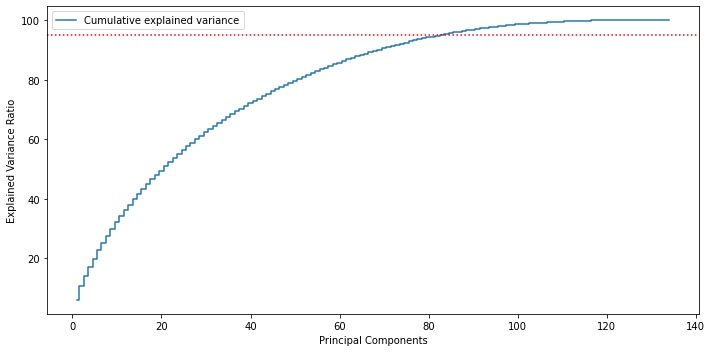

In [105]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')

# Plot horizontal line
# matplotlib.pyplot.axhline(y, xmin, xmax, color, label)

plt.axhline(95, 0, 20, color='red', linestyle='dotted')

plt.tight_layout()
plt.show()

In [106]:
pca_new = PCA(n_components=85)
pca_new.fit(normalized_x_train)

PCA(n_components=85)

In [107]:
# Check out the new components
df_comp1 = pd.DataFrame(pca_new.components_,columns=list(normalized_x_train))
df_comp1.head()

,8,9,10,11,13,14,15,16,17,18,...,560,570,571,572,573,582,583,586,587,589
0,0.057343,-0.019720,0.016827,-0.095040,-0.000000e+00,-0.046056,-0.013198,0.005477,-0.064403,-0.037656,...,0.025504,0.015072,0.078544,-0.029373,-0.016227,0.020886,0.011297,-0.050916,0.054864,0.062126
1,0.023076,0.002333,-0.008701,0.140245,-0.000000e+00,-0.017761,-0.030555,-0.028525,0.132409,-0.057522,...,-0.037943,0.013831,-0.018144,0.024321,0.039510,0.077876,-0.007903,0.037893,-0.010732,-0.030698
2,0.057163,0.014453,0.036198,-0.047712,-5.551115e-17,-0.102310,0.006313,-0.005048,-0.055766,0.044600,...,-0.071260,-0.031241,0.049745,0.040438,0.078715,0.069732,-0.001311,0.016143,-0.036692,-0.042487
3,0.056363,-0.039120,-0.009748,0.027839,6.938894e-17,0.082981,0.007216,0.027236,-0.002071,-0.093312,...,0.002619,0.008559,0.099731,0.023197,0.045037,0.053953,0.059290,-0.117649,0.083491,0.141738
4,-0.015502,0.032266,0.026837,-0.124658,1.040834e-17,-0.056005,-0.019779,-0.010198,-0.136634,0.072620,...,-0.087787,-0.064488,0.069208,0.068008,0.084008,-0.037806,-0.030297,-0.004761,0.006233,0.014350


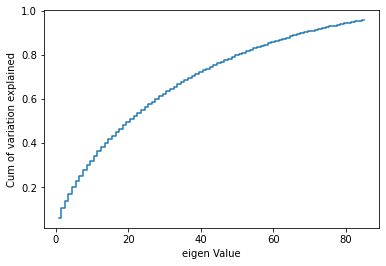

In [108]:
# Plot cumulative variances vs eigen values
plt.step(list(range(1,86)),np.cumsum(pca_new.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [109]:
# Create training dataset with the trained PCA model
pca_normalized_x_train = pca_new.transform(normalized_x_train)
pca_normalized_x_train

array([[ 0.06741676, -3.12438567, -0.58352356, ...,  0.47556355,
        -0.06548148,  0.4301905 ],
       [ 0.12491735, -1.2534989 , -0.14415502, ...,  0.93725922,
         0.55624267,  0.56969349],
       [ 1.77205174, -0.04319458,  0.59962085, ..., -0.21716085,
        -0.62792133,  1.77221411],
       ...,
       [-0.64967242, -1.49676849, -0.93105756, ..., -0.27267717,
         0.97844224, -0.42533669],
       [ 1.6222205 , -0.53226692,  0.59062314, ..., -0.48396026,
        -0.16270917, -0.27038849],
       [-1.18525819, -0.33551047, -3.57480313, ..., -0.15772003,
         0.2052386 , -0.42351668]])

In [110]:
# Create test dataset with the trained PCA model
pca_normalized_x_test = pca_new.transform(normalized_x_test)
pca_normalized_x_test

array([[-6.34485753e-02,  1.58920250e+00,  1.10862925e+00, ...,
        -1.32569149e+00, -4.51339666e-01,  4.26624841e-01],
       [-2.05594072e+00,  2.34168042e+00, -3.37230948e-02, ...,
        -3.51798827e-01, -6.49279604e-01, -1.61062029e-03],
       [-1.69754924e+00,  1.09982962e+00,  1.05952280e+00, ...,
        -4.44796845e+00,  6.00252705e-01, -1.44293006e+00],
       ...,
       [ 1.75142263e+00, -2.20585762e+00,  3.96667645e-01, ...,
         1.88646037e+00,  7.67261296e-01, -1.16050170e+00],
       [ 6.75535992e-01, -2.19640048e-01,  8.46801348e-01, ...,
         1.13630518e+00, -5.75731498e-01, -1.51444231e-01],
       [ 6.82066072e-01, -2.58217941e+00,  9.86545999e-01, ...,
        -1.87818118e-01,  9.86942444e-02,  3.63651247e-01]])

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Display and explain the classification report in detail.</div>

In [111]:
# Choose the best parameters from GridSearchCV
lr = LogisticRegression(C=0.2782559402207126, class_weight='balanced', 
                        penalty='l2', random_state=1, solver='newton-cg')

lr.fit(pca_normalized_x_train, y_train_res)

LogisticRegression(C=0.2782559402207126, class_weight='balanced',
                   random_state=1, solver='newton-cg')

In [112]:
# Cross Validation
stratified_kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(lr, pca_normalized_x_train, y_train_res, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8462051649928265
Standard deviation:  0.024434057406945056


In [113]:
# Training Accuracy
lr_train_accu = lr.score(pca_normalized_x_train, y_train_res)
print('Training Accuracy for Logistic Regression Model is: ',lr_train_accu*100)

# Test Accuracy
lr_test_accu = lr.score(pca_normalized_x_test, y_test)
print('Test Accuracy for Logistic Regression Model is: ',lr_test_accu*100)

Training Accuracy for Logistic Regression Model is:  86.42578125
Test Accuracy for Logistic Regression Model is:  75.3715498938429


In [114]:
y_predict_lr = lr.predict(pca_normalized_x_test)
#print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

          -1       0.94      0.78      0.86       439
           1       0.11      0.38      0.17        32

    accuracy                           0.75       471
   macro avg       0.53      0.58      0.51       471
weighted avg       0.89      0.75      0.81       471



* The classes are being predicted with 75% accuracy.
* 94% of -1 class were predicted correctly as precision is 0.94.
* 11% of 1 class were predicted correctly as precision is 0.11.
* 78% of -1 class and 38% of 1 class were correctly identified, as given by recall.
* 85% of -1 class and 17% of 1 class predictions were identified correctly, as given by the f1-score.

In [115]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_lr).ravel()
lr_recall = round(tp/(tp+fn), 3)   # Recall
lr_precision = round(tp/(tp+fp), 3)  # Precision
lr_specificity =round(tn/(tn+fp),3)    # Specificity
lr_type_1_error = fp # False Positives
lr_type_2_error = fn # False Negatives
from sklearn.metrics import f1_score
lr_f1_score = f1_score(y_test,y_predict_lr) # F1 Score
lr_train_accu,lr_test_accu,lr_recall,lr_precision,lr_specificity,lr_type_1_error,lr_type_2_error,lr_f1_score

(0.8642578125,
 0.7537154989384289,
 0.375,
 0.111,
 0.781,
 96,
 20,
 0.17142857142857143)

In [116]:
final_result = pd.DataFrame({'Model' : ['Logistic Regression'], 
                             'Training Accuracy' : [lr_train_accu], 
                             'Test Accuracy' : [lr_test_accu],
                             'Type 1 Error' : [lr_type_1_error],
                             'Type 2 Error' :  [lr_type_2_error],
                             'F1-Score':[lr_f1_score],})
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Apply the above steps for all possible models that you have learnt so far. </div>

In [117]:
# Gaussian Naive Bayes Model for Classification

# Call library
from sklearn.naive_bayes import GaussianNB

# Define Model
gnb = GaussianNB()

# Fit the model
gnb.fit(pca_normalized_x_train, y_train_res)

GaussianNB()

In [118]:
# Cross Validation
stratified_kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(gnb, pca_normalized_x_train, y_train_res, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())


Accuracy Score
Avearge:  0.9531348637015782
Standard deviation:  0.034292932326928434


* As there aren't many hyperparameters to tune for Gaussian Naive Bayes Model, hyperparameter tuning is skipped for this model

In [119]:
# Make predictions
y_predict_gnb = gnb.predict(pca_normalized_x_test)

# Training Accuracy
gnb_train_accu = gnb.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
gnb_test_accu = gnb.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_gnb).ravel()
gnb_recall = round(tp/(tp+fn), 3)   # Recall
gnb_precision = round(tp/(tp+fp), 3)  # Precision
gnb_specificity =round(tn/(tn+fp),3)    # Specificity
gnb_type_1_error = fp # False Positives
gnb_type_2_error = fn # False Negatives
gnb_f1_score = f1_score(y_test,y_predict_gnb) # F1 Score
gnb_train_accu,gnb_test_accu,gnb_recall,gnb_precision,gnb_specificity,gnb_type_1_error,gnb_type_2_error,gnb_f1_score

(0.95361328125,
 0.9129511677282378,
 0.031,
 0.091,
 0.977,
 10,
 31,
 0.046511627906976744)

              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       439
           1       0.09      0.03      0.05        32

    accuracy                           0.91       471
   macro avg       0.51      0.50      0.50       471
weighted avg       0.88      0.91      0.89       471



<AxesSubplot:>

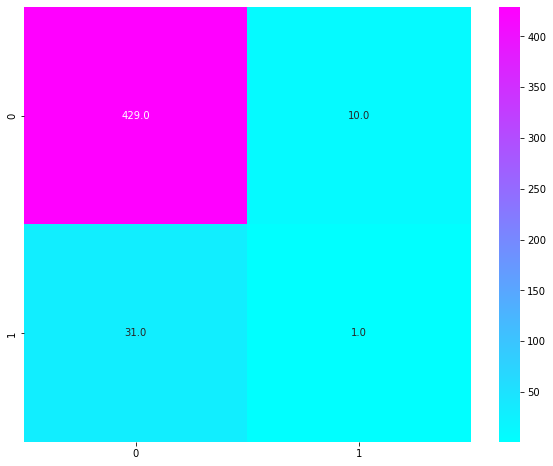

In [180]:
print(metrics.classification_report(y_test, y_predict_gnb))
cfm= confusion_matrix(y_test, y_predict_gnb)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap = 'cool', fmt = '.1f')

In [121]:
final_result.loc[1] = ['Gaussian Naive Bayes', gnb_train_accu,gnb_test_accu,
                       gnb_type_1_error,gnb_type_2_error,gnb_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512


In [144]:
# Define Model
knn = KNeighborsClassifier()

# Define grid
grid={'n_neighbors': range(1, 25),
    'metric': ['canberra', 'euclidean', 'minkowski'],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

      

knn_randomCV = RandomizedSearchCV(knn, param_distributions=grid, random_state=1, refit=True, cv=10)

knn_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['canberra', 'euclidean',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 25),
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

In [145]:
print("tuned hpyerparameters :(best parameters) ",knn_randomCV.best_params_)
print("accuracy :",knn_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'canberra', 'algorithm': 'brute'}
accuracy : 95.70301291248204


              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       439
           1       0.14      0.22      0.17        32

    accuracy                           0.85       471
   macro avg       0.54      0.56      0.54       471
weighted avg       0.89      0.85      0.87       471



<AxesSubplot:>

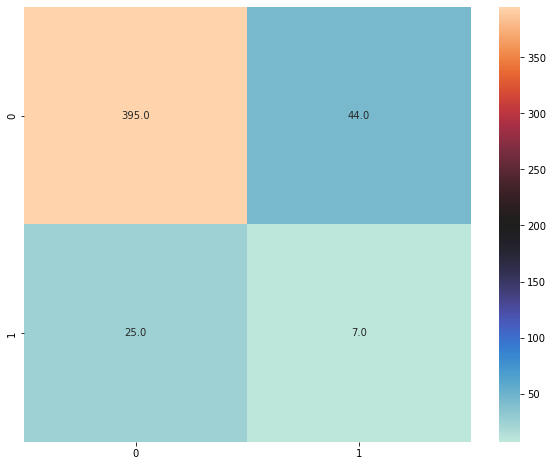

In [182]:
# Make predictions
y_predict_knn = knn_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
knn_train_accu = knn_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
knn_test_accu = knn_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_knn).ravel()
knn_recall = round(tp/(tp+fn), 3)   # Recall
knn_precision = round(tp/(tp+fp), 3)  # Precision
knn_specificity =round(tn/(tn+fp),3)    # Specificity
knn_type_1_error = fp # False Positives
knn_type_2_error = fn # False Negatives
knn_f1_score = f1_score(y_test,y_predict_knn) # F1 Score

print(metrics.classification_report(y_test, y_predict_knn))
cfm= confusion_matrix(y_test, y_predict_knn)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap = 'icefire', fmt = '.1f')

In [148]:
final_result.loc[2] = ['K Nearest Neighbours', knn_train_accu,knn_test_accu,
                       knn_type_1_error,knn_type_2_error,knn_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675


In [149]:
# SVC Model
# Call library
from sklearn.svm import SVC

# Define Model
svc = SVC()

# Define grid
grid={'C': [0.1, 1, 10],
      'gamma': [1, 0.1, 0.01],
      'kernel': ['linear', 'rbf', 'sigmoid'],
      'random_state':[1]
      }

svc_randomCV = RandomizedSearchCV(svc, param_distributions=grid, random_state=1, refit=True, cv=10)

svc_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'random_state': [1]},
                   random_state=1)

In [150]:
print("tuned hpyerparameters :(best parameters) ",svc_randomCV.best_params_)
print("accuracy :",svc_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'kernel': 'linear', 'gamma': 1, 'C': 10}
accuracy : 85.35246293639406


              precision    recall  f1-score   support

          -1       0.94      0.79      0.86       439
           1       0.10      0.34      0.16        32

    accuracy                           0.76       471
   macro avg       0.52      0.56      0.51       471
weighted avg       0.89      0.76      0.81       471



<AxesSubplot:>

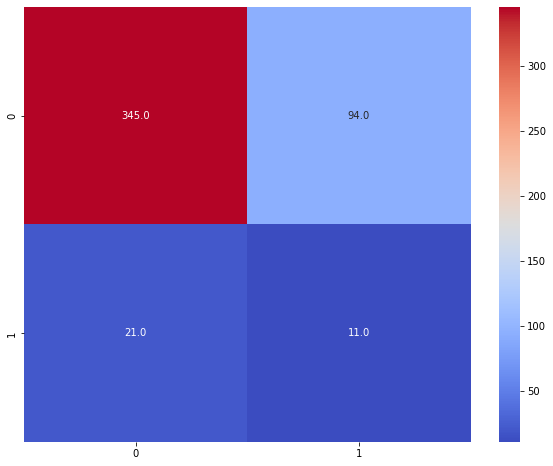

In [183]:
# Make predictions
y_predict_svc = svc_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
svc_train_accu = svc_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
svc_test_accu = svc_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_svc).ravel()
svc_recall = round(tp/(tp+fn), 3)   # Recall
svc_precision = round(tp/(tp+fp), 3)  # Precision
svc_specificity =round(tn/(tn+fp),3)    # Specificity
svc_type_1_error = fp # False Positives
svc_type_2_error = fn # False Negatives
svc_f1_score = f1_score(y_test,y_predict_svc) # F1 Score

print(metrics.classification_report(y_test, y_predict_svc))
cfm= confusion_matrix(y_test, y_predict_svc)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = '.1f')

In [184]:
final_result.loc[3] = ['Support Vector Classifier', svc_train_accu,svc_test_accu,
                       svc_type_1_error,svc_type_2_error,svc_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021
5,Random Forest Classifier,0.937988,0.821656,53,31,0.023256
6,AdaBoost Classifier,1.000000,0.908705,11,32,0.000000
7,Gradient Boosting Classifier,1.000000,0.925690,3,32,0.000000
8,Bagging Classifier,0.998535,0.917197,9,30,0.093023


In [153]:
# Decision Tree Classifier Model
# Call library
from sklearn.tree import DecisionTreeClassifier

# Define Model
dt = DecisionTreeClassifier()

# Define grid
grid={'criterion': ['gini','entropy'],
      'max_depth': list(range(1, 5)),
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'class_weight':[None,'balanced'],
      'max_features':['sqrt','log2','auto',None],
      'random_state':[1]
      }
      

dt_randomCV = RandomizedSearchCV(dt, param_distributions=grid, random_state=1, refit=True, cv=10)

dt_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'random_state': [1]},
                   random_state=1)

In [154]:
print("tuned hpyerparameters :(best parameters) ",dt_randomCV.best_params_)
print("accuracy :",dt_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 4, 'criterion': 'gini', 'class_weight': 'balanced'}
accuracy : 78.90650406504065


              precision    recall  f1-score   support

          -1       0.94      0.66      0.78       439
           1       0.08      0.41      0.13        32

    accuracy                           0.64       471
   macro avg       0.51      0.53      0.45       471
weighted avg       0.88      0.64      0.73       471



<AxesSubplot:>

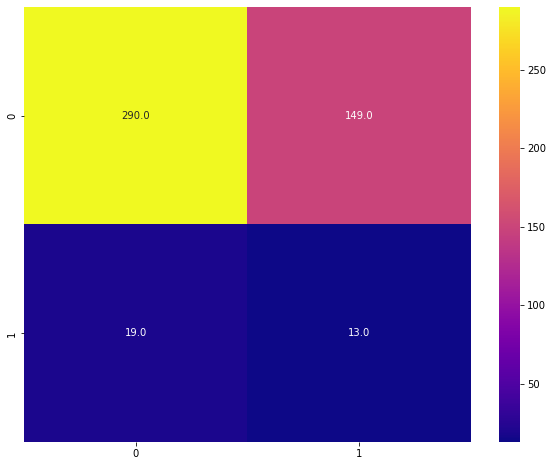

In [185]:
# Make predictions
y_predict_dt = dt_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
dt_train_accu = dt_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
dt_test_accu = dt_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_dt).ravel()
dt_recall = round(tp/(tp+fn), 3)   # Recall
dt_precision = round(tp/(tp+fp), 3)  # Precision
dt_specificity =round(tn/(tn+fp),3)    # Specificity
dt_type_1_error = fp # False Positives
dt_type_2_error = fn # False Negatives
dt_f1_score = f1_score(y_test,y_predict_dt) # F1 Score

print(metrics.classification_report(y_test, y_predict_dt))
cfm= confusion_matrix(y_test, y_predict_dt)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap = 'plasma', fmt = '.1f')

In [156]:
final_result.loc[4] = ['Decision Tree Classifier', dt_train_accu,dt_test_accu,
                       dt_type_1_error,dt_type_2_error,dt_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021


In [157]:
# Random Forest Classifier Model
# Call library
from sklearn.ensemble import RandomForestClassifier

# Define Model
rf = RandomForestClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100, 150, 200],
      'criterion': ['gini','entropy'],
      'max_depth': list(range(1, 5)),
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'class_weight':[None,'balanced','balanced_subsample'],
      'max_features':['sqrt','log2','auto'],
      'bootstrap':[True,False],
      'oob_score':[True,False],
      'random_state':[1]
      }
      

rf_randomCV = RandomizedSearchCV(rf, param_distributions=grid, random_state=1, refit=True, cv=10)

rf_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 50, 100, 150, 200],
                                        'oob_score': [True, False],
                                        'random_state': [1]},
                   random_state=1)

In [158]:
print("tuned hpyerparameters :(best parameters) ",rf_randomCV.best_params_)
print("accuracy :",rf_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'oob_score': False, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}
accuracy : 92.33309421329507


              precision    recall  f1-score   support

          -1       0.93      0.88      0.90       439
           1       0.02      0.03      0.02        32

    accuracy                           0.82       471
   macro avg       0.47      0.46      0.46       471
weighted avg       0.86      0.82      0.84       471



<AxesSubplot:>

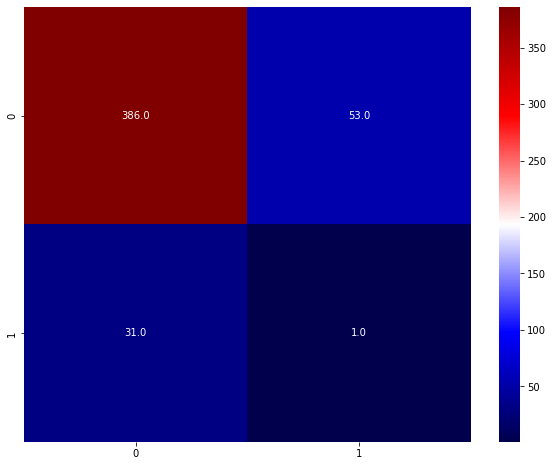

In [186]:
# Make predictions
y_predict_rf = rf_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
rf_train_accu = rf_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
rf_test_accu = rf_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_rf).ravel()
rf_recall = round(tp/(tp+fn), 3)   # Recall
rf_precision = round(tp/(tp+fp), 3)  # Precision
rf_specificity =round(tn/(tn+fp),3)    # Specificity
rf_type_1_error = fp # False Positives
rf_type_2_error = fn # False Negatives
rf_f1_score = f1_score(y_test,y_predict_rf) # F1 Score

print(metrics.classification_report(y_test, y_predict_rf))
cfm= confusion_matrix(y_test, y_predict_rf)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap = 'seismic', fmt = '.1f')

In [160]:
final_result.loc[5] = ['Random Forest Classifier', rf_train_accu,rf_test_accu,
                       rf_type_1_error,rf_type_2_error,rf_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021
5,Random Forest Classifier,0.937988,0.821656,53,31,0.023256


In [161]:
# AdaBoost Classifier Model
# Call library
from sklearn.ensemble import AdaBoostClassifier

# Define Model
ada_boost = AdaBoostClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100],
      'algorithm': ['SAMME', 'SAMME.R'],
      'learning_rate':[0,0.25,0.5,0.75,1],
      'random_state':[1]
      }

ada_randomCV = RandomizedSearchCV(ada_boost, param_distributions=grid, random_state=1, refit=True, cv=10)

ada_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0, 0.25, 0.5, 0.75,
                                                          1],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [1]},
                   random_state=1)

In [162]:
print("tuned hpyerparameters :(best parameters) ",ada_randomCV.best_params_)
print("accuracy :",ada_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'n_estimators': 100, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}
accuracy : 97.55834528933522


              precision    recall  f1-score   support

          -1       0.93      0.97      0.95       439
           1       0.00      0.00      0.00        32

    accuracy                           0.91       471
   macro avg       0.47      0.49      0.48       471
weighted avg       0.87      0.91      0.89       471



<AxesSubplot:>

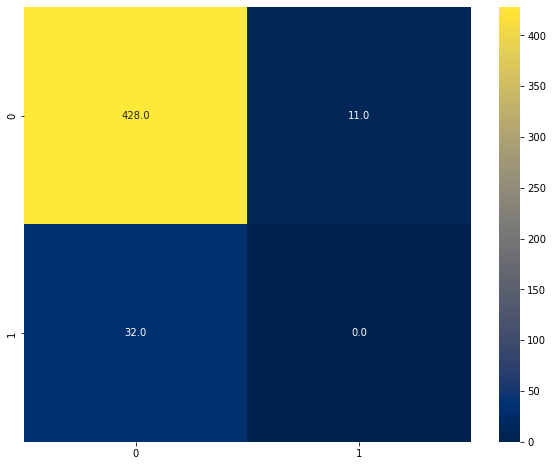

In [191]:
# Make predictions
y_predict_ada = ada_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
ada_train_accu = ada_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
ada_test_accu = ada_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_ada).ravel()
ada_recall = round(tp/(tp+fn), 3)   # Recall
ada_precision = round(tp/(tp+fp), 3)  # Precision
ada_specificity =round(tn/(tn+fp),3)    # Specificity
ada_type_1_error = fp # False Positives
ada_type_2_error = fn # False Negatives
ada_f1_score = f1_score(y_test,y_predict_ada) # F1 Score

print(metrics.classification_report(y_test, y_predict_ada))
cfm= confusion_matrix(y_test, y_predict_ada)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap ='cividis', fmt = '.1f')

In [164]:
final_result.loc[6] = ['AdaBoost Classifier', ada_train_accu,ada_test_accu,
                       ada_type_1_error,ada_type_2_error,ada_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021
5,Random Forest Classifier,0.937988,0.821656,53,31,0.023256
6,AdaBoost Classifier,1.000000,0.908705,11,32,0.000000


In [165]:
# Gradient Boosting Classifier Model
# Call library
from sklearn.ensemble import GradientBoostingClassifier

# Define Model
gbcl = GradientBoostingClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100],
      'loss': ['deviance', 'exponential'],
      'learning_rate':[0,0.25,0.5,0.75,1],
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'max_depth': list(range(1, 5)),
      'max_features':['sqrt','log2','auto'],
      'random_state':[1]
      }

gbcl_randomCV = RandomizedSearchCV(gbcl, param_distributions=grid, random_state=1, refit=True, cv=10)

gbcl_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0, 0.25, 0.5, 0.75,
                                                          1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [1]},
                   random_state=1)

In [166]:
print("tuned hpyerparameters :(best parameters) ",gbcl_randomCV.best_params_)
print("accuracy :",gbcl_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'loss': 'deviance', 'learning_rate': 0.75}
accuracy : 99.5604973696796


              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



<AxesSubplot:>

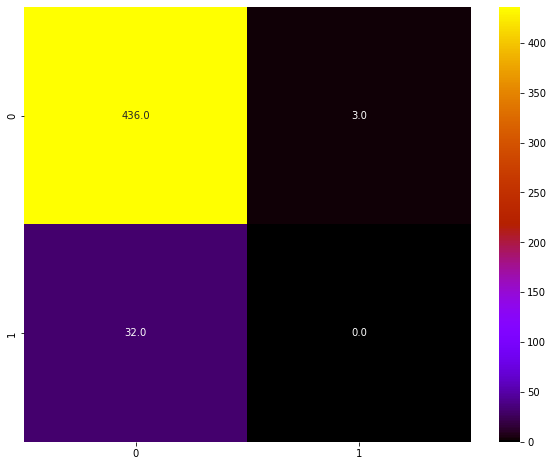

In [193]:
# Make predictions
y_predict_gbcl = gbcl_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
gbcl_train_accu = gbcl_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
gbcl_test_accu = gbcl_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_gbcl).ravel()
gbcl_recall = round(tp/(tp+fn), 3)   # Recall
gbcl_precision = round(tp/(tp+fp), 3)  # Precision
gbcl_specificity =round(tn/(tn+fp),3)    # Specificity
gbcl_type_1_error = fp # False Positives
gbcl_type_2_error = fn # False Negatives
gbcl_f1_score = f1_score(y_test,y_predict_gbcl) # F1 Score

print(metrics.classification_report(y_test, y_predict_gbcl))
cfm= confusion_matrix(y_test, y_predict_gbcl)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap ='gnuplot', fmt = '.1f')

In [168]:
final_result.loc[7] = ['Gradient Boosting Classifier', gbcl_train_accu,gbcl_test_accu,
                       gbcl_type_1_error,gbcl_type_2_error,gbcl_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021
5,Random Forest Classifier,0.937988,0.821656,53,31,0.023256
6,AdaBoost Classifier,1.000000,0.908705,11,32,0.000000
7,Gradient Boosting Classifier,1.000000,0.925690,3,32,0.000000


In [169]:
# Bagging Classifier Model
# Call library
from sklearn.ensemble import BaggingClassifier

# Define Model
bgcl = BaggingClassifier()

# Define grid
grid={'n_estimators': [5, 10, 15],
      'base_estimator':[SVC(),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB()],
      #'bootstrap':[True,False],
      #'oob_score':[True,False],
      'random_state':[1]
      }

bgcl_randomCV = RandomizedSearchCV(bgcl, param_distributions=grid, random_state=1, refit=True, cv=10)

bgcl_randomCV.fit(pca_normalized_x_train, y_train_res)

RandomizedSearchCV(cv=10, estimator=BaggingClassifier(),
                   param_distributions={'base_estimator': [SVC(),
                                                           DecisionTreeClassifier(),
                                                           LogisticRegression(),
                                                           KNeighborsClassifier(),
                                                           GaussianNB()],
                                        'n_estimators': [5, 10, 15],
                                        'random_state': [1]},
                   random_state=1)

In [170]:
print("tuned hpyerparameters :(best parameters) ",bgcl_randomCV.best_params_)
print("accuracy :",bgcl_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 1, 'n_estimators': 10, 'base_estimator': SVC()}
accuracy : 98.68101386896221


              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       439
           1       0.18      0.06      0.09        32

    accuracy                           0.92       471
   macro avg       0.56      0.52      0.52       471
weighted avg       0.88      0.92      0.90       471



<AxesSubplot:>

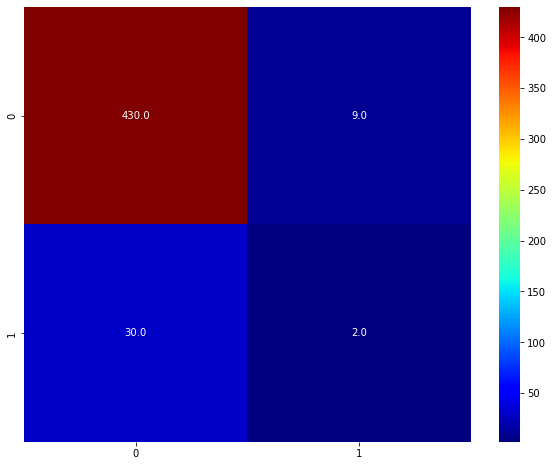

In [195]:
# Make predictions
y_predict_bgcl = bgcl_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
bgcl_train_accu = bgcl_randomCV.score(pca_normalized_x_train, y_train_res)

# Test Accuracy
bgcl_test_accu = bgcl_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_bgcl).ravel()
bgcl_recall = round(tp/(tp+fn), 3)   # Recall
bgcl_precision = round(tp/(tp+fp), 3)  # Precision
bgcl_specificity =round(tn/(tn+fp),3)    # Specificity
bgcl_type_1_error = fp # False Positives
bgcl_type_2_error = fn # False Negatives
bgcl_f1_score = f1_score(y_test,y_predict_bgcl) # F1 Score

print(metrics.classification_report(y_test, y_predict_bgcl))
cfm= confusion_matrix(y_test, y_predict_bgcl)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cfm, annot = True, cmap ='jet', fmt = '.1f')

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Display and compare all the models designed with their train and test accuracies. </div>

In [172]:
final_result.loc[8] = ['Bagging Classifier', bgcl_train_accu,bgcl_test_accu,
                       bgcl_type_1_error,bgcl_type_2_error,bgcl_f1_score]
final_result

,Model,Training Accuracy,Test Accuracy,Type 1 Error,Type 2 Error,F1-Score
0,Logistic Regression,0.864258,0.753715,96,20,0.171429
1,Gaussian Naive Bayes,0.953613,0.912951,10,31,0.046512
2,K Nearest Neighbours,0.961426,0.853503,44,25,0.168675
3,Support Vector Classifier,0.881348,0.755839,94,21,0.160584
4,Decision Tree Classifier,0.819336,0.643312,149,19,0.134021
5,Random Forest Classifier,0.937988,0.821656,53,31,0.023256
6,AdaBoost Classifier,1.000000,0.908705,11,32,0.000000
7,Gradient Boosting Classifier,1.000000,0.925690,3,32,0.000000
8,Bagging Classifier,0.998535,0.917197,9,30,0.093023


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Select the final best trained model along with your detailed comments for selecting this model</div>

* From the above table the best performing models are Gaussian Naive Bayes, AdaBoost Classifier, Gradient Boosting Classifier and Bagging Classifier.
* For the above models, the difference between training and test accuracy is small, f1-scores are low and Type 1 and Type 2 errors are also the lowest.

* The **Best Trained Model** is **Gradient Boosting Classifier**.
* **Gradient Boosting Classifier** has 100% training accuracy and 93% test accuracy which is acceptable.
* **Gradient Boosting Classifier** also has the lowest Type 1 error and one of the lowest Type 2 errors as well.
* **Gradient Boosting Classifier** has 0 f1-score.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Pickle the selected model for future use. </div>

In [173]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('GradientBoostingClassifier_RandomSearchCV', 'wb') as files:
    pickle.dump(gbcl_randomCV, files)
    
print("File saved successfully!")

File saved successfully!


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Write your conclusion on the results.</div>

In [174]:
# Define Gradient Boosting Model with best features
gbcl = GradientBoostingClassifier(random_state=1, n_estimators= 100, min_samples_split=3, 
                                  min_samples_leaf= 4, max_features='log2', max_depth= 4, 
                                  loss= 'deviance', learning_rate= 0.75)

# Fit the model
gbcl.fit(pca_normalized_x_train, y_train_res)

GradientBoostingClassifier(learning_rate=0.75, loss='deviance', max_depth=4,
                           max_features='log2', min_samples_leaf=4,
                           min_samples_split=3, random_state=1)

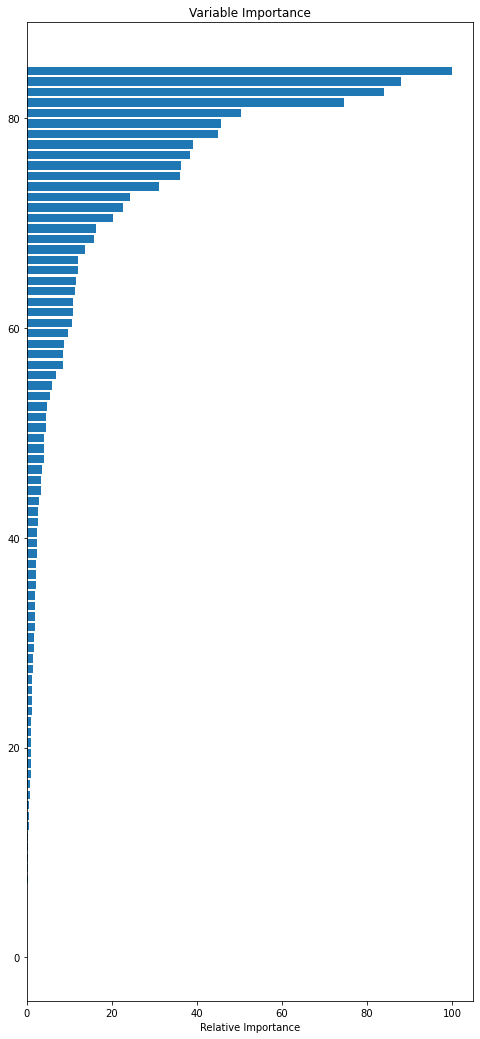

In [175]:
# Plot feature importance
feature_importance = gbcl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, tr_x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

* The given dataset has data from different sensors. But not all were actually required to model it.
* Many sensors had highly correlated values and multi-collinearity issues and were thus removed before model building.
* PCA was also done to remove additional variables that did not have high variance.
* Various algorithms, cross validation technqiues and hyper parameter tuning was done to arrive at the best fitting model.
* The Best Trained Model is Gradient Boosting Classifier for this kind of data.

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)